## amt.pledged, currency & goal columns

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

In [4]:
# Read in and examine data
df = pd.read_csv('most_backed.csv')
del df['Unnamed: 0']
df.head(1)

,amt.pledged,blurb,category,currency,goal,location,num.backers,num.backers.tier,pledge.tier,title,url
0,8782571.0,\nThis is a card game for people who are into ...,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens


In [5]:
# Create sub dataframe for only money-related columns
sub = df[['amt.pledged', 'goal', 'currency']]

# Rename amt.pledged column
sub.rename(columns={'amt.pledged': 'amt_pledged'}, inplace=True)

# Examine new sub dataframe
sub.head()

//anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2816: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,amt_pledged,goal,currency
0,8782571.0,10000.0,usd
1,6465690.0,15000.0,usd
2,5408916.0,1000000.0,usd
3,5702153.0,2000000.0,usd
4,3336371.0,400000.0,usd


In [6]:
# Check unique currencies
df['currency'].value_counts()

usd    3437
gbp     252
cad     128
eur      96
aud      53
sek      14
nzd      10
dkk       7
chf       3
Name: currency, dtype: int64

In [7]:
# Create exchange rate dictionary (note: exchange rates based on 11/9/16)
exchange_dict = {
    'usd': 1.00,
    'gbp': 1.25,
    'cad': 0.75,
    'eur': 1.09,
    'aud': 0.77,
    'sek': 0.11,
    'nzd': 0.73,
    'dkk': 0.15,
    'chf': 1.02,}

# Create a new column that maps out exchange rate based on currency
sub['exchange_rate'] = sub['currency'].map(exchange_dict)

# Create new column that converts all data to USD 
sub['pledged_USD'] = sub['amt_pledged'] * sub['exchange_rate']
sub['goal_USD'] = sub['goal'] * sub['exchange_rate']

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

In [8]:
# Just checking to make sure conversions worked
sub[sub['currency'] == 'chf'].loc[:, ['currency', 'amt_pledged', 'pledged_USD', 'goal', 'goal_USD']]

,currency,amt_pledged,pledged_USD,goal,goal_USD
1857,chf,530792.0,541407.84,80000.0,81600.0
2023,chf,53862.0,54939.24,39270.0,40055.4
2933,chf,247688.0,252641.76,125000.0,127500.0


In [9]:
# Create new sub dataframe with only USD info
sub = sub[['pledged_USD', 'goal_USD', 'currency']]
sub.head(2)

,pledged_USD,goal_USD,currency
0,8782571.0,10000.0,usd
1,6465690.0,15000.0,usd


In [10]:
# Create a new column that shows pledged/goal
sub['percent_total'] = sub['pledged_USD'] / sub['goal_USD']

print np.min(sub['percent_total'])
print np.max(sub['percent_total'])
print np.mean(sub['percent_total'])
print np.median(sub['percent_total'])
print ''
print np.min(sub['pledged_USD'])
print np.max(sub['pledged_USD'])
print np.mean(sub['pledged_USD'])
print np.median(sub['pledged_USD'])

1.0
104277.0
70.1129344973
4.58425714286

2406.25
20338986.0
284961.51782
120634.0


In [11]:
# Reordering columns
sub = sub[['pledged_USD', 'goal_USD', 'percent_total', 'currency']]

In [12]:
# Check correlation of numeric columns
sub.corr()

,pledged_USD,goal_USD,percent_total
pledged_USD,1.000000,0.434658,-0.003379
goal_USD,0.434658,1.000000,-0.015598
percent_total,-0.003379,-0.015598,1.000000


In [13]:
# Examine distribution of data
sub.describe(percentiles=[.25, .5, .75, .95, 1])/1000

,pledged_USD,goal_USD,percent_total
count,4.000000,4.000000,4.000000
mean,284.961518,60.997025,0.070113
std,705.872588,127.082577,2.014247
min,2.406250,0.001000,0.001000
25%,67.246375,12.500000,0.002010
50%,120.634000,30.000000,0.004584
75%,252.446843,60.000000,0.010515
95%,942.663200,200.000000,0.038172
100%,20338.986000,2000.000000,104.277000
max,20338.986000,2000.000000,104.277000


In [14]:
sub[sub['pledged_USD'] < 1000000].shape

(3807, 4)

In [15]:
sub['currency'].value_counts()

usd    3437
gbp     252
cad     128
eur      96
aud      53
sek      14
nzd      10
dkk       7
chf       3
Name: currency, dtype: int64

In [17]:
currency_list = ['usd', 'gbp', 'cad', 
    'eur',
    'aud',
    'sek',
    'nzd',
    'dkk',
    'chf']

In [18]:
# Get median values of numeric columns by country
median_dict = {}

def get_median(i):
    for j in sub.columns:
        x = sub[sub['currency']==i]
        median_dict.update({i: [x['pledged_USD'].median(), x['goal_USD'].median(), x['percent_total'].median()]})

    return median_dict

def run_currency(currency_list):
    for i in currency_list:
        get_median(i)
    return get_median(i)

run_currency(currency_list)

{'aud': [87760.75, 15400.0, 5.9677],
 'cad': [85953.75, 22500.0, 4.278666604248725],
 'chf': [252641.76, 81600.0, 1.9815040000000002],
 'dkk': [99633.3, 30000.0, 3.32111],
 'eur': [183974.015, 43600.0, 4.1181383333333335],
 'gbp': [101544.375, 31250.0, 2.9794033333333334],
 'nzd': [67224.97, 19345.0, 4.474361666666667],
 'sek': [86449.44, 29150.0, 4.326611911764706],
 'usd': [124182.0, 30000.0, 4.688533333333333]}

In [140]:
sub.columns

Index([u'pledged_USD', u'goal_USD', u'percent_total', u'currency'], dtype='object')

In [ ]:
# Create dataframe of median values
median_df = pd.DataFrame(median_dict).T
median_df.columns = sub.columns[:-1]

In [45]:
median_df['difference'] = median_df['pledged_USD'] - median_df['goal_USD']
median_df

,pledged_USD,goal_USD,percent_total,difference
aud,87760.750,15400.0,5.967700,72360.750
cad,85953.750,22500.0,4.278667,63453.750
chf,252641.760,81600.0,1.981504,171041.760
dkk,99633.300,30000.0,3.321110,69633.300
eur,183974.015,43600.0,4.118138,140374.015
gbp,101544.375,31250.0,2.979403,70294.375
nzd,67224.970,19345.0,4.474362,47879.970
sek,86449.440,29150.0,4.326612,57299.440
usd,124182.000,30000.0,4.688533,94182.000


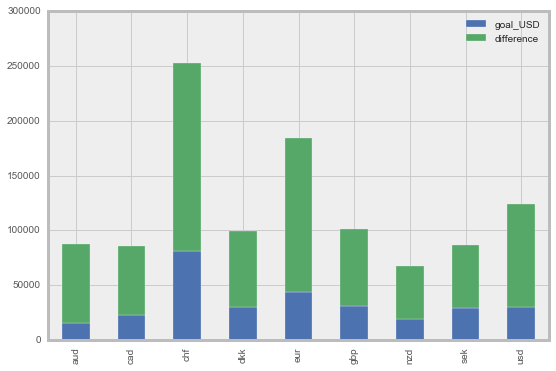

In [46]:
plt.style.use('seaborn-notebook')
median_df[['goal_USD', 'difference']].plot.bar(stacked = True)

In [100]:
for p in ax.patches:
    height = p.get_height()
    print height
    

87760.75
85953.75
252641.76
99633.3
183974.015
101544.375
67224.97
86449.44
124182.0
15400.0
22500.0
81600.0
30000.0
43600.0
31250.0
19345.0
29150.0
30000.0


In [106]:
total = float(len(median_df)) # one person per row 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height+10, '%1.2f'%(height/total))

9.0

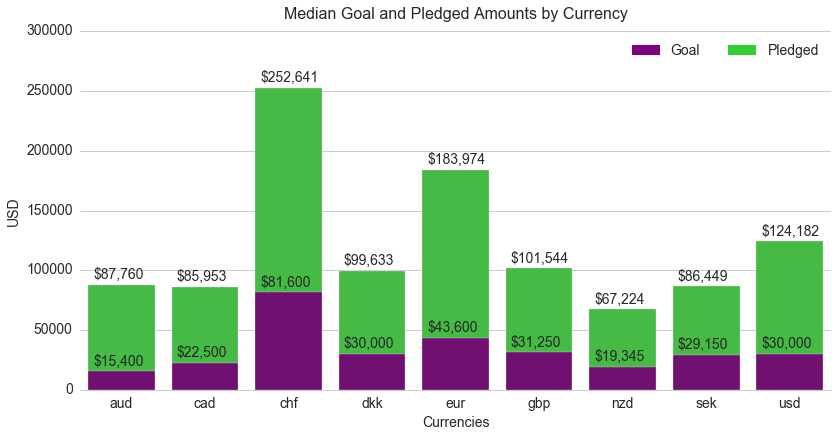

In [134]:
# Set seaborn parameters
sns.set_style("whitegrid")
sns.set_palette('muted')
sns.set_context({"figure.figsize": (12, 6)})

# Plot sns stacked barplot
ax = sns.barplot(x = list(median_df.index), y = median_df['pledged_USD'], color = "limegreen", )
bottom_plot = sns.barplot(x = list(median_df.index), y =  median_df['goal_USD'], color = "purple", )

topbar = plt.Rectangle((0,0),1,1,fc="limegreen", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='purple',  edgecolor = 'none')

ewdeds

l = plt.legend([bottombar, topbar], ['Goal', 'Pledged'], loc=1, ncol = 2, prop={'size':14})
l.draw_frame(False)
plt.title('Median Goal and Pledged Amounts by Currency', y=1.02, fontsize=16)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("USD")
bottom_plot.set_xlabel("Currencies")

#Set fonts to consistent size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(14)


In [39]:
print plt.style.available

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


(0.625, 10.125)

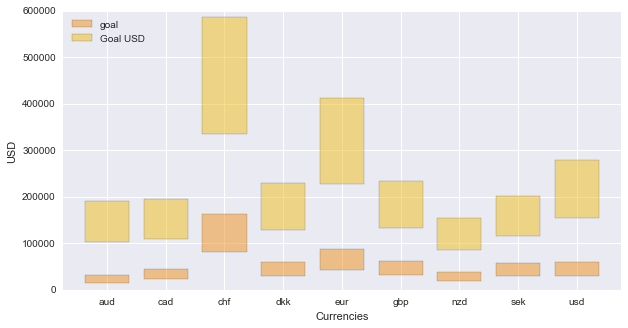

In [28]:
# Create the general blog and the "subplots" i.e. the bars
f, ax1 = plt.subplots(1, figsize=(10,5))

# Set the bar width
bar_width = 0.75

# positions of the left bar-boundaries
bar_l = [i+1 for i in range(len(median_df['pledged_USD']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create a bar plot, in position bar_1
'''ax1.bar(bar_l, 
        # using the pre_score data
        median_df['pledged_USD'], 
        # set the width
        width=bar_width,
        # with the label pre score
        label='Pledged USD', 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F4561D')'''

# Create a bar plot, in position bar_1
ax1.bar(bar_l, 
        # using the mid_score data
        median_df['goal_USD'], 
        # set the width
        width=bar_width,
        # with pre_score on the bottom
        bottom=median_df['goal_USD'], 
        # with the label mid score
        label='goal', 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F1911E')

# Create a bar plot, in position bar_1
ax1.bar(bar_l, 
        # using the post_score data
        median_df['pledged_USD'], 
        # set the width
        width=bar_width,
        # with pre_score and mid_score on the bottom
        bottom=[i+j for i,j in zip(median_df['pledged_USD'],median_df['goal_USD'])], 
        # with the label post score
        label='Goal USD', 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F1BD1A')

# set the x ticks with names
plt.xticks(tick_pos, list(median_df.index))

# Set the label and legends
ax1.set_ylabel("USD")
ax1.set_xlabel("Currencies")
plt.legend(loc='upper left')

# Set a buffer around the edge
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])

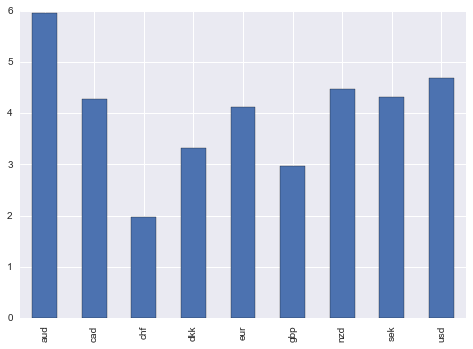

In [20]:
median_df['percent_total'].plot(kind='bar')

In [2]:
fig, (ax1, ax2) = plt.subplot(figsize=(16,8))


NameError: name 'plt' is not defined

In [21]:
sub['goal_USD'].describe()/1000

count       4.000000
mean       60.997025
std       127.082577
min         0.001000
25%        12.500000
50%        30.000000
75%        60.000000
max      2000.000000
Name: goal_USD, dtype: float64

In [22]:
sub[sub['goal_USD']>0]['goal_USD'].head()

0      10000.0
1      15000.0
2    1000000.0
3    2000000.0
4     400000.0
Name: goal_USD, dtype: float64

In [75]:
dreaming

2000000.0

In [74]:
# Make goal bins for histogram
low = sub['goal_USD'].quantile(0.10)
med = sub['goal_USD'].quantile(0.33)   
high = sub['goal_USD'].quantile(.67)   
dreaming = sub['goal_USD'].quantile(1.0)   

def make_bins(x):
    if x <= dreaming:
        return 'dreaming'
    elif x <= high:
        return 'high'
    elif x <= med:
        return 'med'
    else:
        return 'low'
    
sub['goal_bins'] = sub['goal_USD'].apply(make_bins)
sub['goal_bins'].value_counts()

dreaming    4000
Name: goal_bins, dtype: int64

In [244]:
# Make pledged bins for histogram
dreaming = sub['pledged_USD'].quantile(0.10)
high = sub['pledged_USD'].quantile(0.33)   
med = sub['pledged_USD'].quantile(.67)   
low = sub['pledged_USD'].quantile(1.0)   

def make_bins(x):
    if x <= dreaming:
        return 'dreaming'
    elif x <= high:
        return 'high'
    elif x <= med:
        return 'med'
    else:
        return 'low'
    
sub['pledged_bins'] = sub['pledged_USD'].apply(make_bins)
sub['pledged_bins'].value_counts()

med         1360
low         1320
high         920
dreaming     400
Name: pledged_bins, dtype: int64

In [78]:
adf = pd.read_csv('/users/kristensu/downloads/all_data.csv', sep='|')
del adf['Unnamed: 0']
adf.shape

(4000, 44)

In [79]:
adf.columns

Index([u'amt_pledged', u'blurb', u'category', u'new_category', u'currency',
       u'goal', u'location', u'num_backers', u'num_backers_tier',
       u'pledge_tier', u'title', u'url', u'exchange_rate', u'pledged_USD',
       u'goal_USD', u'percent_received', u'goal_level', u'goal_level_num',
       u'pledge_level', u'pledge_level_num', u'creator', u'creator_names',
       u'country', u'start', u'end', u'days', u'tier_amt_lower_50',
       u'tier_amt_51_250', u'tier_amt_251_500', u'tier_amt_501_750',
       u'tier_amt_751_1000', u'tier_amt_1001_more', u'min_tier_amount',
       u'max_tier_amount', u'avg_tier_amount', u'median_tier_amount',
       u'avg_num_backers_tier', u'median_num_backers_tier', u'num_backers_bin',
       u'tier_backer_ratio', u'num_tiers', u'num_tiers_with_backers',
       u'project_updated', u'unique_words_ratio'],
      dtype='object')

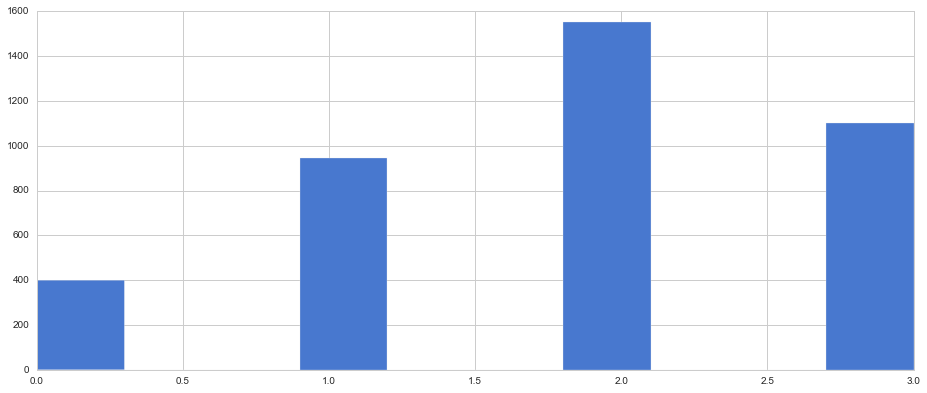

In [84]:
adf['goal_level_num'].hist()

TypeError: cannot concatenate 'str' and 'float' objects

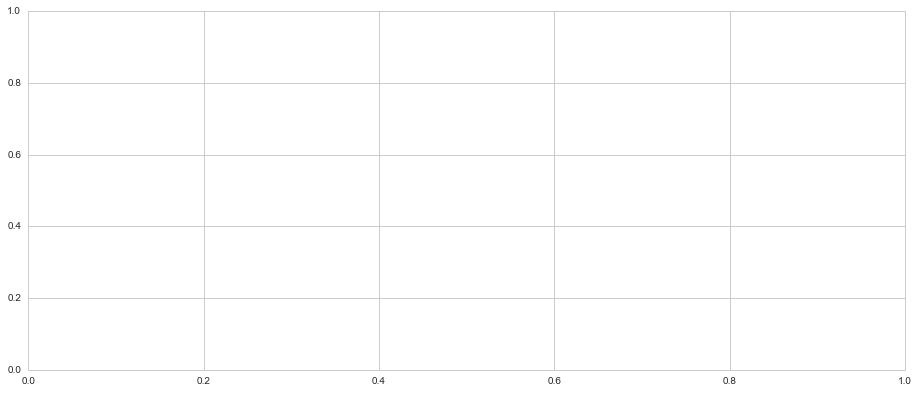

In [85]:
adf['pledge_level'].hist()

In [ ]:
adf_sub = adf[['']]